# Telecom Churm Case Study

### Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Understanding and defining churn
There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and Southeast Asia, while postpaid is more common in Europe in North America.

This project is based on the Indian and Southeast Asian market.

### Definitions of churn
There are various ways to define churn, such as:

Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

In this project, you will use the usage-based definition to define churn.

### High-value churn
In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

Understanding the business objective and the data
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Reading and Understanding the Data

In [2]:
data = pd.read_csv('telecom_churn_data.csv')
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [4]:
data.dtypes

mobile_number       int64
circle_id           int64
loc_og_t2o_mou    float64
std_og_t2o_mou    float64
loc_ic_t2o_mou    float64
                   ...   
aon                 int64
aug_vbc_3g        float64
jul_vbc_3g        float64
jun_vbc_3g        float64
sep_vbc_3g        float64
Length: 226, dtype: object

In [5]:
data.shape

(99999, 226)

### Handling Missing Values

In [6]:
# dropping columns with more tha 30% missing values
null_percentage = data.isnull().sum()*100/data.shape[0]
col_drop = null_percentage[null_percentage>30].index.to_list()
data.drop(col_drop, axis=1, inplace=True)

In [7]:
null_percentage = data.isnull().sum()*100/data.shape[0]
null_percentage[null_percentage>0]

loc_og_t2o_mou          1.018010
std_og_t2o_mou          1.018010
loc_ic_t2o_mou          1.018010
last_date_of_month_7    0.601006
last_date_of_month_8    1.100011
                          ...   
ic_others_9             7.745077
date_of_last_rech_6     1.607016
date_of_last_rech_7     1.767018
date_of_last_rech_8     3.622036
date_of_last_rech_9     4.760048
Length: 126, dtype: float64

In [8]:
# dropping rows with more tha 50% missing values
null_percentage = data.isnull().sum(axis=1)*100/data.shape[1]
row_drop = null_percentage[null_percentage>50].index.to_list()
data.drop(row_drop, inplace=True)

Inputing missing values with 0

In [9]:
data.fillna(0, inplace=True)

### Drop columns with only one unique value

In [10]:
cnt_unique = pd.Series({col:data[col].nunique() for col in data.columns})
to_drop = cnt_unique[cnt_unique == 1].index
data.drop(to_drop, axis=1, inplace=True)

### Filter high-value customers

Define high-value customers as follows: 

Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [11]:
data['avg_rech_amt'] = (data.total_rech_amt_6 + data.total_rech_amt_7)/2
data = data[data.avg_rech_amt > data.avg_rech_amt.quantile(0.7)].reset_index(drop=True)
data

,mobile_number,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt
0,7000701601,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
1,7001524846,7/31/2014,8/31/2014,9/30/2014,378.721,492.223,137.362,166.787,413.69,351.03,...,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0
2,7002191713,7/31/2014,8/31/2014,9/30/2014,492.846,205.671,593.260,322.732,501.76,108.39,...,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0
3,7000875565,7/31/2014,8/31/2014,9/30/2014,430.975,299.869,187.894,206.490,50.51,74.01,...,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0
4,7000187447,7/31/2014,8/31/2014,9/30/2014,690.008,18.980,25.499,257.583,1185.91,9.28,...,0,0,0,0,667,0.00,0.00,0.00,0.0,408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29654,7000519799,7/31/2014,8/31/2014,9/30/2014,292.930,641.110,303.172,132.145,18.43,99.61,...,0,0,0,0,464,0.00,0.00,0.00,0.0,536.0
29655,7001386760,7/31/2014,8/31/2014,9/30/2014,261.269,410.614,290.851,330.963,5.01,142.59,...,0,0,0,0,1022,0.00,0.00,0.00,0.0,392.0
29656,7001453306,7/31/2014,8/31/2014,9/30/2014,414.303,321.093,371.016,306.689,17.56,0.00,...,0,0,0,0,3054,0.00,0.00,0.00,0.0,465.0
29657,7001729035,7/31/2014,8/31/2014,9/30/2014,644.973,455.228,564.334,267.451,806.73,549.36,...,0,0,0,0,2696,497.45,598.67,604.08,0.0,848.5


### Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

- total_ic_mou_9

- total_og_mou_9

- vol_2g_mb_9

- vol_3g_mb_9

In [12]:
data['churn'] = np.where((data['total_ic_mou_9']==0) & (data['total_og_mou_9']==0) & (data['vol_2g_mb_9']==0) & (data['vol_3g_mb_9']==0), 1, 0)
data.churn.value_counts(normalize=True)

0    0.914832
1    0.085168
Name: churn, dtype: float64

After tagging churn, we will remove all the attributes with _9 in their names.

In [13]:
actionphase_col = [i for i in data. columns if '_9' in i]
data.drop(actionphase_col, axis=1, inplace=True)

### Removing Columns containing Dates

In [14]:
date_cols = [i for i in data.columns.to_list() if 'date' in i]
data.drop(date_cols, axis=1, inplace=True)

In [15]:
#dropping Mobile number because it does not contribute to our prediction
#dropping circle_id because it is the same value throughout the database.
data.drop(['mobile_number'], axis=1, inplace=True)

In [16]:
# exploring mou columns
data[[i for i in data.columns if 'total' in i and ('ic' in i or 'og' in i)]]

,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
0,487.53,609.24,350.16,626.46,558.04,428.74
1,508.36,431.66,171.56,103.86,28.49,16.54
2,907.09,192.41,1015.26,968.61,172.58,1144.53
3,346.81,286.01,233.38,364.86,381.56,294.46
4,1249.53,0.81,0.00,91.88,2.31,0.00
...,...,...,...,...,...,...
29654,528.61,1223.18,467.16,15.79,126.53,49.09
29655,288.54,644.58,453.21,24.93,271.83,301.41
29656,451.24,370.28,363.93,117.81,99.54,53.13
29657,1600.79,1183.21,1380.01,580.73,622.28,660.01


# Deriving New Features
the first set of features we will derive will be flag variables which will indicate if a user shows a downward trend in these three indicators:
- total mou
- total data
- apru

In [17]:
# mou calculations
for i in range(6,9):
    data['total_mou_'+str(i)] = data['total_ic_mou_'+str(i)] + data['total_og_mou_'+str(i)]

In [18]:
data['mou_decline'] = np.where((data.total_mou_6>data.total_mou_7) & (data.total_mou_7>data.total_mou_8), 1,0)

In [19]:
# data usage calculations
for i in range(6,9):
    data['data_usage_'+str(i)] = data[[j for j in data.columns if 'vol' in j and str(i) in j]].sum(axis=1)

In [20]:
data['data_usage_decline'] = np.where((data.data_usage_6>data.data_usage_7) & (data.data_usage_7>data.data_usage_8), 1,0)

In [21]:
# arpu calculations
data['arpu_decline'] = np.where((data.arpu_6>data.arpu_7) & (data.arpu_7>data.arpu_8), 1,0)
data['arpu_avg'] = (data.arpu_6 + data.arpu_7 + data.arpu_8) / 3

# Exploratory Data Analysis

### Box Plots

box plot for mean arpu of churned vs non churned subscribers

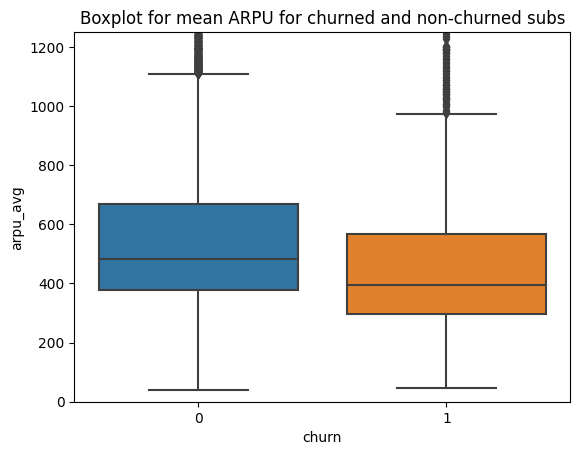

In [22]:
sns.boxplot(data=data, x='churn', y='arpu_avg')
plt.title('Boxplot for mean ARPU for churned and non-churned subs')
plt.ylim((0,1250))
plt.show()

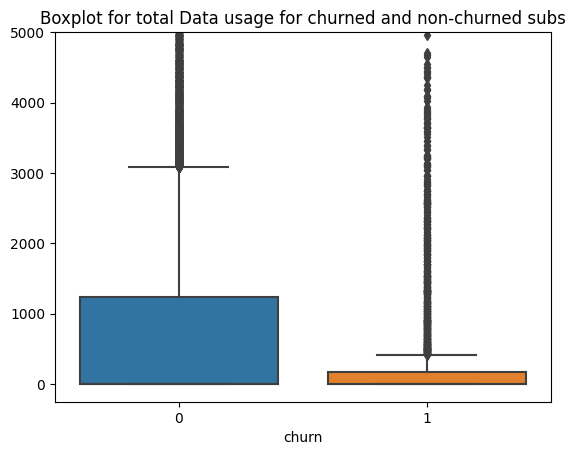

In [23]:
sns.boxplot(x=data.churn, y= data[[i for i in data.columns if 'data_usage' in i]].sum(axis=1))
plt.title('Boxplot for total Data usage for churned and non-churned subs')
plt.ylim((-250,5000))
plt.show()

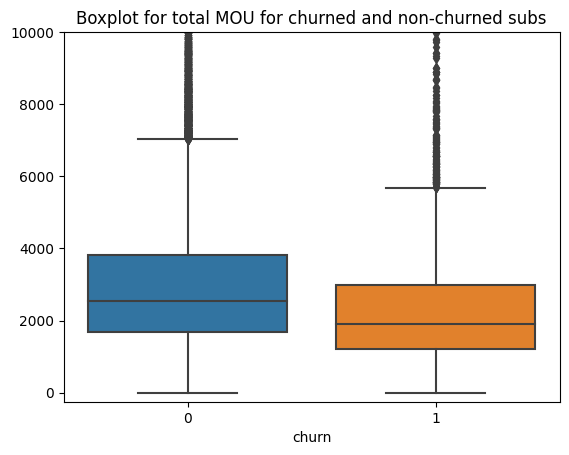

In [24]:
sns.boxplot(x=data.churn, y= data[[i for i in data.columns if 'total_mou' in i]].sum(axis=1))
plt.title('Boxplot for total MOU for churned and non-churned subs')
plt.ylim((-250,10000))
plt.show()

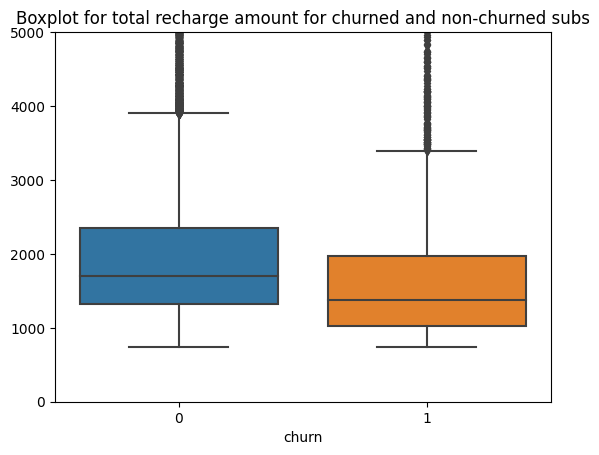

In [25]:
sns.boxplot(x=data.churn, y= data[[i for i in data.columns if 'total_rech_amt' in i]].sum(axis=1))
plt.title('Boxplot for total recharge amount for churned and non-churned subs')
plt.ylim((0,5000))
plt.show()

Now, we will use our derived flags `arpu_decline`, `data_usage_decline` and `mou decline` to assess the churn rate.

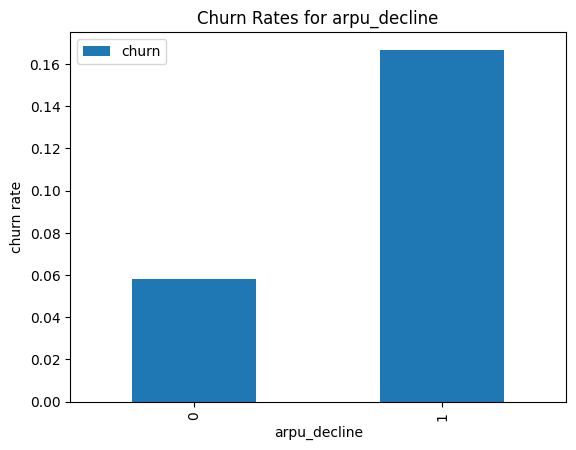

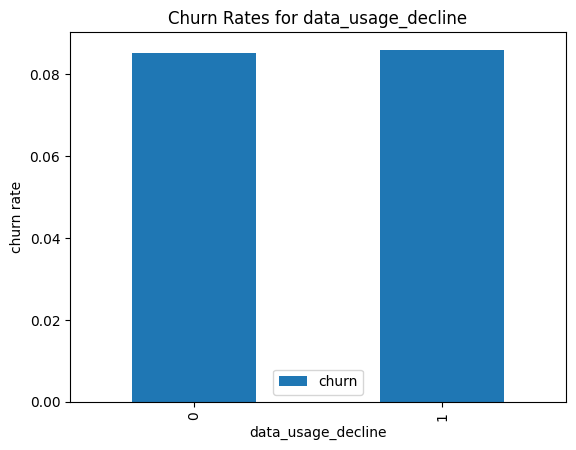

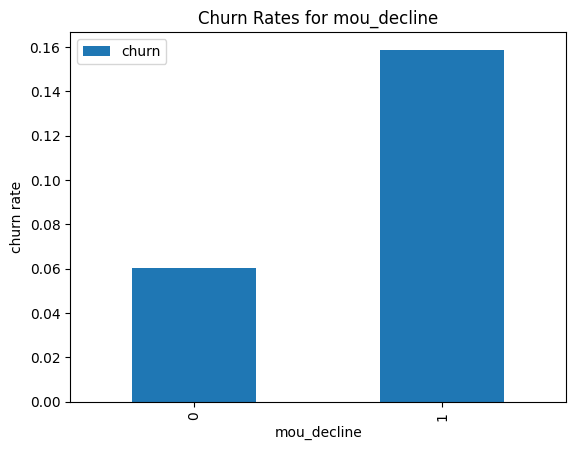

In [26]:

for i in ['arpu_decline', 'data_usage_decline', 'mou_decline']:
    data.pivot_table(values='churn', index=i).plot.bar()
    plt.title('Churn Rates for '+i)
    plt.ylabel('churn rate')
    plt.show()

# Splitting Data into Training and Testing sets

In [27]:
X = data.drop('churn', axis=1)
y = data.churn

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=69, stratify=y)

Checking for class imbalance

In [29]:
y_train.value_counts(normalize=True)*100

0    91.485344
1     8.514656
Name: churn, dtype: float64

Dealing with class imbalance using Synthetic Minority Oversampling Technique

In [30]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=69)
X_train, y_train = sm.fit_resample(X_train, y_train)

# Scaling

In [31]:
# we will select the column what are not flag variable to scale using the MinMax Scaler.
# we will check for columns who have unique values other than a 0 or a 1. these columns will be considered for scaling.

cnt_unique = pd.Series({col:X_train[col].nunique() for col in X_train.columns})
to_scale = cnt_unique[cnt_unique > 2].index

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[to_scale] = scaler.fit_transform(X_train[to_scale])

# Principal Component Analysis

In [33]:
from sklearn.decomposition import PCA

pca = PCA(random_state=69)
pca.fit(X_train)

PCA(random_state=69)

In [34]:
cum_variance = np.cumsum(pca.explained_variance_ratio_)

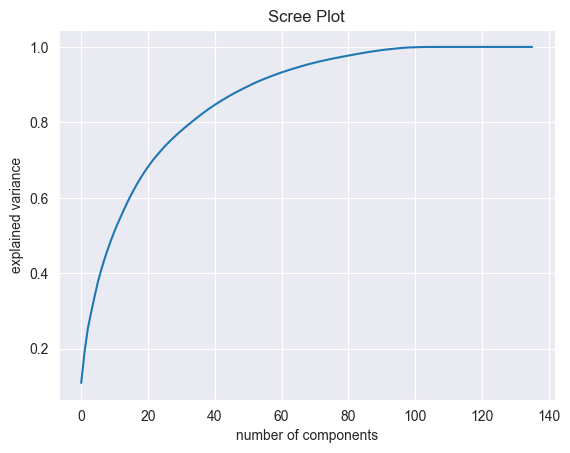

In [35]:
sns.set_style('darkgrid')
plt.title('Scree Plot')
sns.lineplot(cum_variance)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

From the scree plot above, we can conclude that the optimum number of components to be used after PCA is 60. They are able to explain 90% of the total variance inour data. 

In [36]:
pca = PCA(random_state=69, n_components=60)
X_train_pca = pca.fit_transform(X_train)
X_train_pca = pd.DataFrame(X_train_pca)
X_train_pca.columns = ['PCA_'+str(i) for i in X_train_pca.columns]

In [37]:
X_train_pca

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,...,PCA_50,PCA_51,PCA_52,PCA_53,PCA_54,PCA_55,PCA_56,PCA_57,PCA_58,PCA_59
0,3.131351,0.304833,-3.246349,-0.802722,-2.737747,1.657227,-2.362054,4.221609,0.672857,-1.496412,...,-0.985392,-1.546221,-0.117295,-0.372841,-0.527065,0.024517,-0.368364,0.241465,-0.492128,1.149307
1,-1.301873,1.201381,-0.444192,-1.926790,3.373546,-1.369048,0.297407,-0.374413,-0.502895,0.961405,...,-0.185283,0.234200,-0.217947,0.028036,0.092185,-0.540319,0.198143,0.109564,-0.602791,-0.856685
2,-0.476923,1.094787,-0.186542,-1.142846,0.408340,-1.874304,-2.144796,0.095308,-0.425105,0.262673,...,0.106251,-0.281810,0.049324,-0.193336,-0.323181,0.081318,-0.210245,-0.217971,0.009049,-0.304934
3,3.598810,-1.061327,-2.706087,2.267851,-2.355878,-1.328874,-1.780554,-1.744695,-1.006359,-0.000243,...,0.062386,0.462727,0.222585,0.303814,0.524354,0.217228,0.280569,0.113112,-0.229131,0.705431
4,0.280804,-0.791038,-1.531302,0.163965,-1.891045,-1.449199,0.772762,0.513603,-0.571531,0.147473,...,0.271746,0.819872,-0.084155,-0.189936,-0.096466,0.024954,-0.026481,-0.012004,0.085399,-0.565743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40695,-2.354486,0.286463,2.713121,3.614896,0.802438,-2.823162,0.918027,2.534735,-3.126046,-4.139884,...,-0.022241,0.056410,1.207841,1.360491,-0.848628,0.916666,-0.527909,1.016245,-1.417593,-0.240075
40696,0.241972,5.274334,1.204949,-2.768695,-1.112149,-2.295739,3.447670,-0.214736,0.433118,1.251705,...,-0.488989,-0.028109,0.168084,0.071603,0.039219,0.115129,0.102642,0.018181,0.213603,-0.303548
40697,-2.904970,0.520133,0.674278,-0.388786,-0.548761,1.083434,-0.483342,1.356555,1.594614,-0.914257,...,-0.640150,0.476731,0.191202,0.372417,0.131967,-0.047493,-0.465850,0.620031,0.115017,-0.280038
40698,-3.329527,-0.520671,1.758452,2.565089,0.596052,-2.195687,1.010203,1.747350,-1.959960,-2.239040,...,0.060955,-0.178147,-0.022054,-0.146436,0.043521,0.004619,0.077899,-0.062695,0.082060,-0.012471


# Logistic Regression with hyperparameter tuning and cross validation

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

In [39]:
folds = KFold(n_splits=7, shuffle=True, random_state=69)
params = {
    'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

model_cv = GridSearchCV(
    estimator = LogisticRegression(),
    scoring = 'recall',
    cv = folds,
    param_grid = params,
    verbose = 1,
    return_train_score = True
)
model_cv.fit(X_train_pca, y_train)

Fitting 7 folds for each of 7 candidates, totalling 49 fits


GridSearchCV(cv=KFold(n_splits=7, random_state=69, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [40]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.070599,0.003252,0.003112,0.000186,0.001,{'C': 0.001},0.860650,0.873191,0.855218,0.860790,...,7,0.864360,0.861990,0.864574,0.862911,0.864570,0.862509,0.863039,0.863422,0.000987
1,0.094406,0.006247,0.003062,0.000299,0.01,{'C': 0.01},0.865837,0.878704,0.861092,0.863513,...,6,0.868484,0.866116,0.868756,0.868769,0.868736,0.868032,0.866655,0.867936,0.001019
2,0.106792,0.004082,0.002963,0.000340,0.1,{'C': 0.1},0.868949,0.880083,0.866621,0.865895,...,5,0.871234,0.869785,0.871907,0.871066,0.871533,0.869930,0.870157,0.870802,0.000777
3,0.109810,0.006574,0.002712,0.000584,1,{'C': 1},0.869986,0.882150,0.863856,0.865555,...,1,0.871864,0.870243,0.872422,0.871870,0.871875,0.870793,0.870616,0.871383,0.000758
4,0.117763,0.005498,0.003003,0.000004,10,{'C': 10},0.870332,0.882150,0.863511,0.865895,...,4,0.871807,0.870472,0.872479,0.871640,0.871989,0.871023,0.871018,0.871490,0.000636
5,0.113540,0.005968,0.002932,0.000419,100,{'C': 100},0.870332,0.882495,0.863511,0.865895,...,2,0.871864,0.870300,0.872479,0.871640,0.872047,0.871023,0.870960,0.871473,0.000693
6,0.113498,0.007466,0.002787,0.000524,1000,{'C': 1000},0.870332,0.882495,0.863511,0.865895,...,2,0.871864,0.870300,0.872479,0.871583,0.872047,0.871081,0.870960,0.871473,0.000686


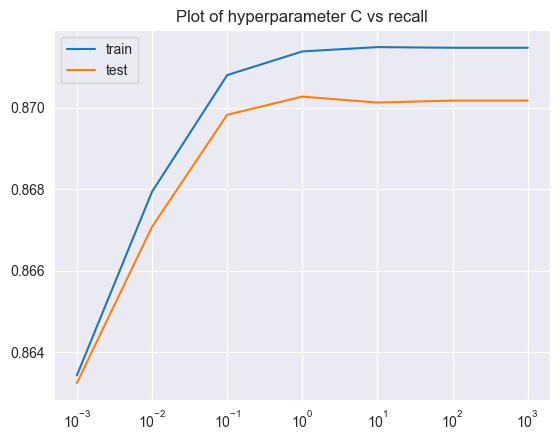

In [41]:
plt.plot(cv_results.param_C, cv_results.mean_train_score)
plt.plot(cv_results.param_C, cv_results.mean_test_score)
plt.legend(['train', 'test'])
plt.title('Plot of hyperparameter C vs recall')
plt.xscale('log')
plt.show()

deriving the best estimator

In [42]:
logreg_pca = model_cv.best_estimator_
logreg_pca.fit(X_train_pca, y_train)

LogisticRegression(C=1)

performing prediction on the training data

In [43]:
y_train_pred = logreg_pca.predict(X_train_pca)

Performance on training data using evaluation metrics

In [44]:
confusion = confusion_matrix(y_train, y_train_pred)

In [45]:
def confusion_metrics(confusion):
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    total = sum(sum(confusion))
    return {
        'sensitivity' : TP / float(TP+FN),
        'specifity' : TN / float(TN+FP),
        'accuracy' : (TN+TP) / float(total),
        'precision' : TP / float(TP + FP),
        'recall' : TP / float(TP + FN)
    }

In [46]:
# printing the confusion matrix
confusion

array([[16874,  3476],
       [ 2618, 17732]], dtype=int64)

In [47]:
# printing evaluation metrics
print('The accuracy on the train set is', confusion_metrics(confusion)['accuracy'])
print('The sensitivity on the train set is', confusion_metrics(confusion)['sensitivity'])
print('The specifity on the train set is', confusion_metrics(confusion)['specifity'])
print('The precision on the train set is', confusion_metrics(confusion)['precision'])
print('The recall on the train set is', confusion_metrics(confusion)['recall'])

The accuracy on the train set is 0.8502702702702702
The sensitivity on the train set is 0.8713513513513513
The specifity on the train set is 0.8291891891891892
The precision on the train set is 0.8360995850622407
The recall on the train set is 0.8713513513513513


### Predicting on unseen Data

In [48]:
# scaling and pca transform on test data
X_test[to_scale] = scaler.transform(X_test[to_scale])
X_test_pca = pca.transform(X_test)

In [49]:
y_test_pred = logreg_pca.predict(X_test_pca)

In [50]:
confusion = confusion_matrix(y_test, y_test_pred)

In [51]:
# printing the confusion matrix
confusion

array([[5624, 1159],
       [ 126,  506]], dtype=int64)

### Performance metrics on unseen data

In [52]:
# printing evaluation metrics
print('The accuracy on the test set is', confusion_metrics(confusion)['accuracy'])
print('The sensitivity on the test set is', confusion_metrics(confusion)['sensitivity'])
print('The specifity on the test set is', confusion_metrics(confusion)['specifity'])
print('The precision on the test set is', confusion_metrics(confusion)['precision'])
print('The recall on the test set is', confusion_metrics(confusion)['recall'])

The accuracy on the test set is 0.8267026298044504
The sensitivity on the test set is 0.8006329113924051
The specifity on the test set is 0.8291316526610645
The precision on the test set is 0.3039039039039039
The recall on the test set is 0.8006329113924051


# Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
# grid search for for decision tree

params = {
    'max_depth' : [5, 10, 15],
    'min_samples_leaf' : [10, 50, 100],
    'min_samples_split' : [10, 50, 100],
    'random_state': [69]
}

model_cv = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    scoring='recall',
    verbose=1,
    cv=5,
    n_jobs = -1,
    return_train_score=True
)

model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100],
                         'random_state': [69]},
             return_train_score=True, scoring='recall', verbose=1)

In [55]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_random_state,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.408605,0.068918,0.007612,0.001157,5,10,10,69,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.757002,...,0.748157,0.008985,20,0.779300,0.746376,0.750921,0.747420,0.743735,0.753550,0.013079
1,1.442873,0.087895,0.009417,0.005088,5,10,50,69,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.757002,...,0.748256,0.009104,19,0.779300,0.746376,0.751351,0.747420,0.743735,0.753636,0.013063
2,1.408951,0.102710,0.008015,0.003021,5,10,100,69,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.757002,...,0.747764,0.008619,21,0.779300,0.746007,0.749631,0.747420,0.743735,0.753219,0.013181
3,1.366309,0.021340,0.008010,0.001000,5,50,10,69,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.758231,...,0.747224,0.009588,22,0.779115,0.745639,0.749816,0.745823,0.741953,0.752469,0.013553
4,1.462697,0.110520,0.007508,0.001309,5,50,50,69,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.758231,...,0.747224,0.009588,22,0.779115,0.745639,0.749816,0.745823,0.741953,0.752469,0.013553


In [56]:
tree = model_cv.best_estimator_
tree

Predicton on the train set

In [57]:
y_train_pred = tree.predict(X_train_pca)

In [58]:
confusion = confusion_matrix(y_train, y_train_pred)

In [59]:
#printing the confusion matrix
confusion

array([[18776,  1574],
       [ 1297, 19053]], dtype=int64)

In [60]:
# printing evaluation metrics on the training set
print('The accuracy on the train set is', confusion_metrics(confusion)['accuracy'])
print('The sensitivity on the train set is', confusion_metrics(confusion)['sensitivity'])
print('The specifity on the train set is', confusion_metrics(confusion)['specifity'])
print('The precision on the train set is', confusion_metrics(confusion)['precision'])
print('The recall on the train set is', confusion_metrics(confusion)['recall'])

The accuracy on the train set is 0.9294594594594595
The sensitivity on the train set is 0.9362653562653562
The specifity on the train set is 0.9226535626535627
The precision on the train set is 0.923692248024434
The recall on the train set is 0.9362653562653562


Prediction on unseen data

In [61]:
y_test_pred = tree.predict(X_test_pca)
confusion = confusion_matrix(y_test, y_test_pred)

In [62]:
# printing th econfusion matrix
confusion

array([[5800,  983],
       [ 244,  388]], dtype=int64)

In [63]:
# printing evaluation metrics
print('The accuracy on the test set is', confusion_metrics(confusion)['accuracy'])
print('The sensitivity on the test set is', confusion_metrics(confusion)['sensitivity'])
print('The specifity on the test set is', confusion_metrics(confusion)['specifity'])
print('The precision on the test set is', confusion_metrics(confusion)['precision'])
print('The recall on the test set is', confusion_metrics(confusion)['recall'])

The accuracy on the test set is 0.8345246122724208
The sensitivity on the test set is 0.6139240506329114
The specifity on the test set is 0.855078873654725
The precision on the test set is 0.2830051057622174
The recall on the test set is 0.6139240506329114


# Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [66]:
params = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [50, 100, 150],
    'min_samples_split': [50, 100, 150],
    'n_estimators': [100,200,300], 
    'max_features': [10, 20],
    'random_state': [69]
}

model_cv = RandomizedSearchCV(estimator = RandomForestClassifier(), 
                           param_distributions = params, 
                           cv = 3,
                           scoring='recall',
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True,
                           random_state=69)

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15],
                                        'max_features': [10, 20],
                                        'min_samples_leaf': [50, 100, 150],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [100, 200, 300],
                                        'random_state': [69]},
                   random_state=69, return_train_score=True, scoring='recall',
                   verbose=1)

In [67]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_state,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,48.047539,1.191719,0.299137,0.011366,69,300,50,150,10,5,...,0.796728,0.808934,0.794840,0.012350,9,0.806295,0.798319,0.801725,0.802113,0.003267
1,44.256686,0.535519,0.299841,0.040184,69,200,50,150,10,10,...,0.820018,0.825004,0.815430,0.010219,6,0.835041,0.822719,0.824427,0.827395,0.005451
2,140.189813,3.079759,0.368483,0.020197,69,300,50,100,20,10,...,0.827978,0.832817,0.824816,0.008138,4,0.843591,0.832375,0.836294,0.837420,0.004648
3,51.865507,0.300387,0.304655,0.016341,69,200,150,100,10,15,...,0.830336,0.840041,0.826732,0.012599,3,0.853321,0.838346,0.842485,0.844717,0.006314
4,52.807081,0.607610,0.295567,0.013580,69,200,100,50,10,10,...,0.849794,0.852720,0.842997,0.011742,1,0.871748,0.856627,0.862608,0.863661,0.006218
5,65.433989,0.408941,0.389655,0.003348,69,300,100,150,10,10,...,0.818396,0.824267,0.814693,0.009690,7,0.833051,0.821392,0.825533,0.826658,0.004826
6,49.988979,0.814762,0.312272,0.013139,69,300,150,50,10,5,...,0.803361,0.814241,0.801081,0.011787,8,0.811823,0.805691,0.806221,0.807911,0.002774
7,26.153023,0.574588,0.143833,0.007029,69,100,100,100,10,15,...,0.826504,0.838420,0.824668,0.012047,5,0.850814,0.836577,0.842191,0.843194,0.005856
8,116.544926,0.103162,0.288933,0.008764,69,300,150,50,20,10,...,0.840360,0.842400,0.834889,0.009217,2,0.859217,0.846676,0.850004,0.851965,0.005305
9,73.170573,0.413111,0.220834,0.010317,69,300,50,150,20,5,...,0.789652,0.795518,0.789975,0.004400,10,0.803641,0.793012,0.792438,0.796364,0.005151


In [68]:
rf = model_cv.best_estimator_
rf

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=200,
                       random_state=69)

### Predicting on the training set

In [69]:
y_train_pred = rf.predict(X_train_pca)
confusion = confusion_matrix(y_train, y_train_pred)

In [70]:
# cheicking the confusion matrix
confusion

array([[18274,  2076],
       [ 2650, 17700]], dtype=int64)

In [71]:
# printing evaluation metrics on the training set
print('The accuracy on the train set is', confusion_metrics(confusion)['accuracy'])
print('The sensitivity on the train set is', confusion_metrics(confusion)['sensitivity'])
print('The specifity on the train set is', confusion_metrics(confusion)['specifity'])
print('The precision on the train set is', confusion_metrics(confusion)['precision'])
print('The recall on the train set is', confusion_metrics(confusion)['recall'])

The accuracy on the train set is 0.8838820638820639
The sensitivity on the train set is 0.8697788697788698
The specifity on the train set is 0.897985257985258
The precision on the train set is 0.8950242718446602
The recall on the train set is 0.8697788697788698


### Fitting on unseen data

In [72]:
y_test_pred = rf.predict(X_test_pca)
confusion = confusion_matrix(y_test, y_test_pred)

In [73]:
# checking the confusion matrix
confusion

array([[6020,  763],
       [ 162,  470]], dtype=int64)

In [74]:
# printing evaluation metrics
print('The accuracy on the test set is', confusion_metrics(confusion)['accuracy'])
print('The sensitivity on the test set is', confusion_metrics(confusion)['sensitivity'])
print('The specifity on the test set is', confusion_metrics(confusion)['specifity'])
print('The precision on the test set is', confusion_metrics(confusion)['precision'])
print('The recall on the test set is', confusion_metrics(confusion)['recall'])

The accuracy on the test set is 0.8752528658125421
The sensitivity on the test set is 0.7436708860759493
The specifity on the test set is 0.8875128998968008
The precision on the test set is 0.38118410381184104
The recall on the test set is 0.7436708860759493


# Logistic regression without PCA
### Recursive Feature Recursion

Building a model with 20 features 

In [75]:
from sklearn.feature_selection import RFE

logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=20).fit(X_train, y_train)

In [76]:
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['onnet_mou_7', 'onnet_mou_8', 'loc_og_t2t_mou_8', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_7', 'total_og_mou_7',
       'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8',
       'last_day_rch_amt_8', 'monthly_2g_8', 'monthly_3g_8', 'sep_vbc_3g',
       'data_usage_decline', 'arpu_decline', 'arpu_avg'],
      dtype='object')

In [77]:
X_train_logreg = X_train[rfe_cols]

## Checking VIFs

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [80]:
vif = pd.DataFrame()
vif['Features'] = X_train_logreg.columns
vif['VIF'] = [variance_inflation_factor(X_train_logreg.values, i) for i in range(X_train_logreg.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False)

,Features,VIF
1,onnet_mou_8,41.90
4,std_og_t2t_mou_8,35.02
0,onnet_mou_7,19.84
6,total_og_mou_7,15.60
3,std_og_t2t_mou_7,13.01
2,loc_og_t2t_mou_8,9.74
5,std_og_t2m_mou_7,6.89
12,total_rech_amt_8,6.36
9,loc_ic_t2m_mou_8,5.90
7,total_og_mou_8,5.56


In [82]:
# dropping onnet_mou_8 and checking VIFs again
X_train_logreg.drop(['onnet_mou_8'], axis=1, inplace=True)
vif = pd.DataFrame()
vif['Features'] = X_train_logreg.columns
vif['VIF'] = [variance_inflation_factor(X_train_logreg.values, i) for i in range(X_train_logreg.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False)

,Features,VIF
0,onnet_mou_7,17.18
5,total_og_mou_7,14.74
2,std_og_t2t_mou_7,12.38
4,std_og_t2m_mou_7,6.53
11,total_rech_amt_8,6.28
8,loc_ic_t2m_mou_8,5.90
6,total_og_mou_8,5.55
9,loc_ic_mou_8,4.59
18,arpu_avg,4.05
3,std_og_t2t_mou_8,3.84


In [83]:
# dropping onnet_mou_7 and checking VIFs again
X_train_logreg.drop(['onnet_mou_7'], axis=1, inplace=True)
vif = pd.DataFrame()
vif['Features'] = X_train_logreg.columns
vif['VIF'] = [variance_inflation_factor(X_train_logreg.values, i) for i in range(X_train_logreg.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False)

,Features,VIF
4,total_og_mou_7,10.75
10,total_rech_amt_8,6.28
1,std_og_t2t_mou_7,5.96
7,loc_ic_t2m_mou_8,5.90
5,total_og_mou_8,5.25
3,std_og_t2m_mou_7,5.13
8,loc_ic_mou_8,4.59
17,arpu_avg,4.05
2,std_og_t2t_mou_8,3.72
6,loc_ic_t2m_mou_7,2.89


In [84]:
# dropping total_og_mou_7 and checking VIFs again
X_train_logreg.drop(['total_og_mou_7'], axis=1, inplace=True)
vif = pd.DataFrame()
vif['Features'] = X_train_logreg.columns
vif['VIF'] = [variance_inflation_factor(X_train_logreg.values, i) for i in range(X_train_logreg.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False)

,Features,VIF
9,total_rech_amt_8,6.12
6,loc_ic_t2m_mou_8,5.87
4,total_og_mou_8,4.84
7,loc_ic_mou_8,4.59
16,arpu_avg,3.73
2,std_og_t2t_mou_8,3.55
5,loc_ic_t2m_mou_7,2.58
1,std_og_t2t_mou_7,2.00
8,total_rech_num_8,1.68
3,std_og_t2m_mou_7,1.64


In [85]:
# dropping total_rech_amt_8 and checking VIFs again
X_train_logreg.drop(['total_rech_amt_8'], axis=1, inplace=True)
vif = pd.DataFrame()
vif['Features'] = X_train_logreg.columns
vif['VIF'] = [variance_inflation_factor(X_train_logreg.values, i) for i in range(X_train_logreg.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False)

,Features,VIF
6,loc_ic_t2m_mou_8,5.86
7,loc_ic_mou_8,4.59
4,total_og_mou_8,4.27
2,std_og_t2t_mou_8,3.54
5,loc_ic_t2m_mou_7,2.55
1,std_og_t2t_mou_7,1.94
0,loc_og_t2t_mou_8,1.59
3,std_og_t2m_mou_7,1.53
8,total_rech_num_8,1.50
15,arpu_avg,1.43


In [86]:
# dropping loc_ic_t2m_mou_8 and checking VIFs again
X_train_logreg.drop(['loc_ic_t2m_mou_8'], axis=1, inplace=True)
vif = pd.DataFrame()
vif['Features'] = X_train_logreg.columns
vif['VIF'] = [variance_inflation_factor(X_train_logreg.values, i) for i in range(X_train_logreg.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False)

,Features,VIF
4,total_og_mou_8,4.19
2,std_og_t2t_mou_8,3.52
6,loc_ic_mou_8,2.26
1,std_og_t2t_mou_7,1.94
5,loc_ic_t2m_mou_7,1.91
0,loc_og_t2t_mou_8,1.53
3,std_og_t2m_mou_7,1.52
7,total_rech_num_8,1.49
14,arpu_avg,1.43
8,last_day_rch_amt_8,1.24


### Now that we have all our VIFs under an acceptable threshold ie under 5, we can proceed further.

In [88]:
import statsmodels.api as sm
logreg_sm = sm.GLM(y_train, sm.add_constant(X_train_logreg), family=sm.families.Binomial()).fit()
logreg_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                40700
Model:                            GLM   Df Residuals:                    40684
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16369.
Date:                Mon, 15 May 2023   Deviance:                       32738.
Time:                        17:09:19   Pearson chi2:                 4.50e+15
No. Iterations:                    11   Pseudo R-squ. (CS):             0.4412
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.5813      0.036    -16.178      0.000      -0.652      -0.511
loc_og_t2t_mou_8       0.1232      0.035      3.513      0.000       0.054       0.192
std_og_t2t_mou_7       0.1480      0.024      6.207      0.000       0.101       0.195
std_og_t2t_mou_8       0.3395      0.037      9.186      0.000       0.267       0.412
std_og_t2m_mou_7       0.4727      0.025     18.643      0.000       0.423       0.522
total_og_mou_8        -1.4558      0.047    -30.751      0.000      -1.549      -1.363
loc_ic_t2m_mou_7       0.6624      0.031     21.303      0.000       0.601       0.723
loc_ic_mou_8          -1.9582      0.052    -37.796      0.000      -2.060      -1.857
total_rech_num_8      -0.5891      0.021    -27.930      0.000      -0.630      -0.548
last_day_rch_amt_8    -0.6216      0.023    -26.756      0.000      -0.667      -0.576
monthly_2g_8          -0.9054      0.041    -22.106      0.000      -0.986      -0.825
monthly_3g_8          -0.9660      0.038    -25.395      0.000      -1.041      -0.891
sep_vbc_3g            -3.3860      0.314    -10.791      0.000      -4.001      -2.771
data_usage_decline    -0.7377      0.073    -10.100      0.000      -0.881      -0.595
arpu_decline          -0.4718      0.032    -14.888      0.000      -0.534      -0.410
arpu_avg               0.7154      0.027     26.215      0.000       0.662       0.769
======================================================================================
"""

All p values are under 0.05, we will procceed with the model.

### Predicting on the training set and finding optimal cutoff

In [94]:
y_train_prob = logreg_sm.predict(sm.add_constant(X_train_logreg))
def cutoff(prob, cutoff):
    return prob.map(lambda x: 1 if x > cutoff else 0)

In [96]:
y_train_df = pd.DataFrame()
y_train_df['prob'] = [i/100 for i in range(100)]
y_train_df['accuracy'] = y_train_df.prob.apply(lambda x: confusion_metrics(confusion_matrix(y_true=y_train, y_pred=cutoff(y_train_prob, x)))['accuracy'])
y_train_df['sensitivity'] = y_train_df.prob.apply(lambda x: confusion_metrics(confusion_matrix(y_true=y_train, y_pred=cutoff(y_train_prob, x)))['sensitivity'])
y_train_df['specifity'] = y_train_df.prob.apply(lambda x: confusion_metrics(confusion_matrix(y_true=y_train, y_pred=cutoff(y_train_prob, x)))['specifity'])
y_train_df

,prob,accuracy,sensitivity,specifity
0,0.00,0.500000,1.000000,0.000000
1,0.01,0.594226,0.993022,0.195430
2,0.02,0.618821,0.990467,0.247174
3,0.03,0.636290,0.988157,0.284423
4,0.04,0.649607,0.986339,0.312875
...,...,...,...,...
95,0.95,0.538624,0.082654,0.994595
96,0.96,0.530049,0.064521,0.995577
97,0.97,0.520467,0.044275,0.996658
98,0.98,0.513194,0.028354,0.998034


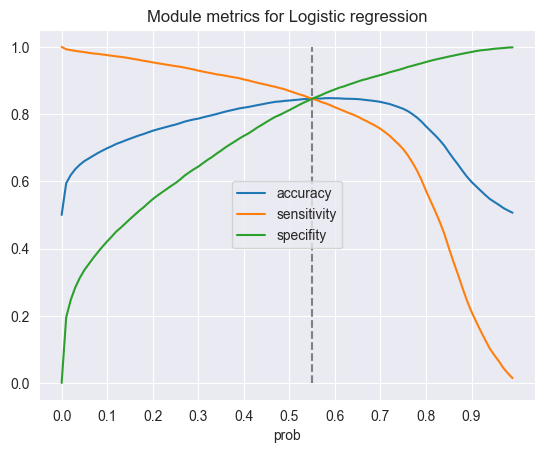

In [98]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
y_train_df.plot.line(x='prob', y=['accuracy','sensitivity','specifity'])
plt.title('Module metrics for Logistic regression')
plt.plot((0.55,0.55),(0,1), '--', color = 'gray')
plt.xticks([i/10 for i in range(10)])
plt.show()

From the graph, we can determine that the optimal cutoff is 0.55

Now, we wil calculate Accuracy, Sensitivity and Specifity for this cutoff value

In [102]:
y_train_df.iloc[55,1:]

accuracy       0.845700
sensitivity    0.845799
specifity      0.845602
Name: 55, dtype: float64